3.  Perform exploratory data analysis (EDA) on Iris dataset to understand its structure. 
Apply Principal Component Analysis (PCA) for dimensionality reduction. Visualize 
the  transformed  dataset  and  analyze  the  effectiveness  of  PCA  in  reducing  the 
dimensions.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [27]:
iris = load_iris(as_frame=True)
df = iris.frame

In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [30]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [32]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

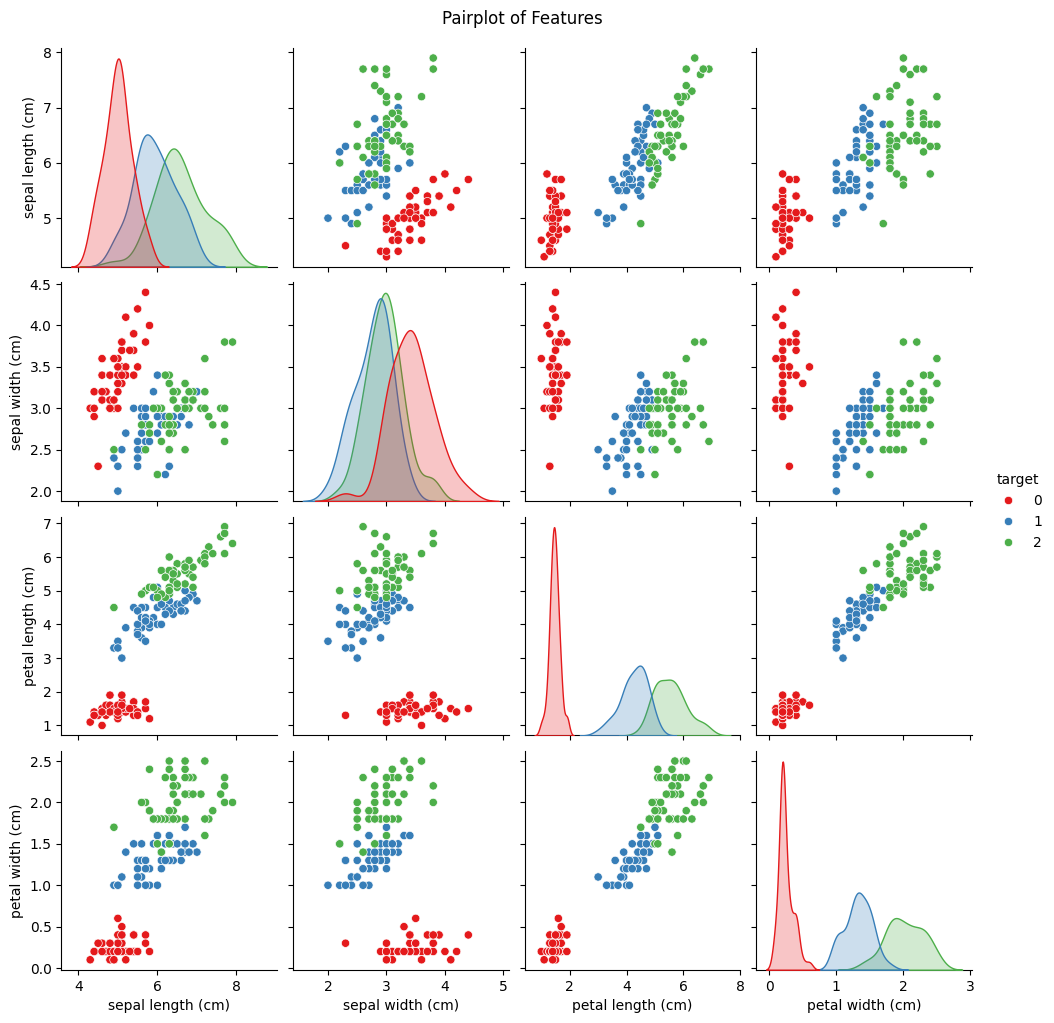

In [33]:
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [34]:
X = df[iris.feature_names]
y = df['target']

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [38]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
X_pca_df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [39]:
print("Explained variance ratio by each component:", pca.explained_variance_ratio_)

Explained variance ratio by each component: [0.72962445 0.22850762]


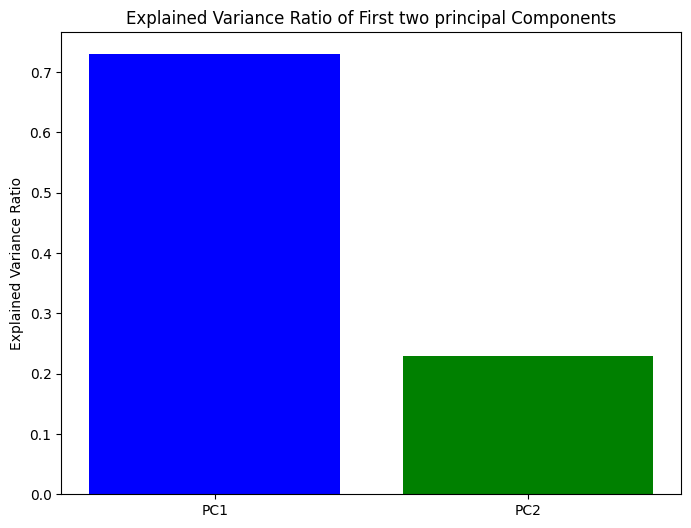

In [40]:
plt.figure(figsize=(8, 6))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color=['blue','green'])
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of First two principal Components')
plt.show()

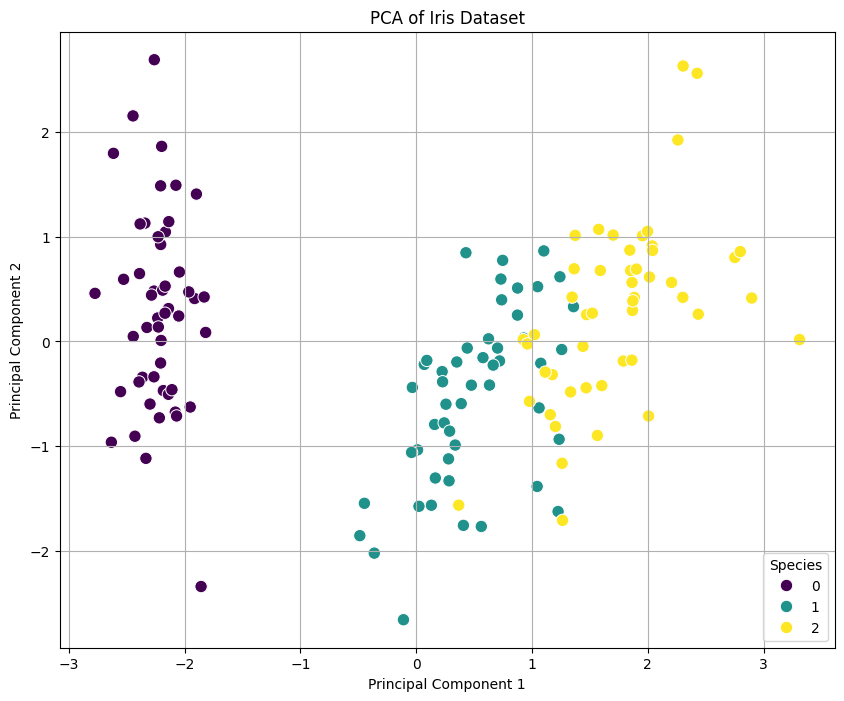

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=80, edgecolor='w')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.legend(title='Species', loc='lower right')
plt.grid()
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

clf1 = LogisticRegression()
clf1.fit(X_train1, y_train1)

y_pred1 = clf1.predict(X_test1)
print(f"Accuracy on PCA-reduced data: {accuracy_score(y_test1, y_pred1)}\n")
print(classification_report(y_test1, y_pred1))

Accuracy on PCA-reduced data: 0.9

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



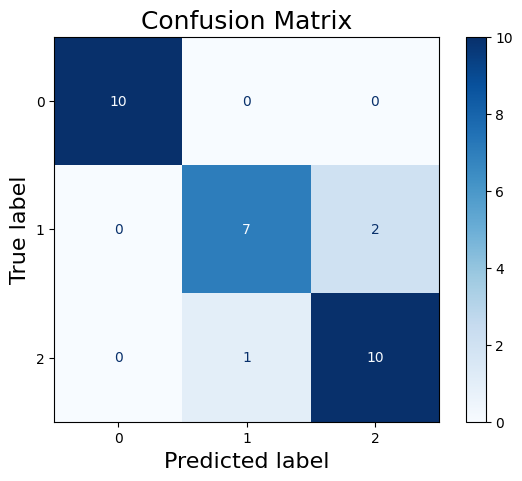

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(7, 5)) 
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = LogisticRegression()
clf2.fit(X_train2, y_train2)

y_pred2 = clf2.predict(X_test2)
print(f"Accuracy on original data: {accuracy_score(y_test2, y_pred2)}\n")
print(classification_report(y_test2, y_pred2))

Accuracy on original data: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



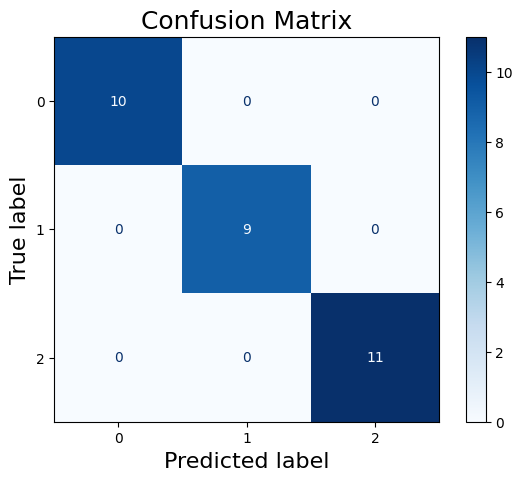

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(7, 5)) 
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()